# Meher Shantanu Singh
## Data Science & Business Analytics Tasks 
## GRIP-TSF-Task 1: Prediction using Supervised Machine Learning
### Task-1

● Predict the percentage of an student based on the no. of study hours.

● This is a simple linear regression task as it involves just 2 variables.

● Using Python to perform task.

● Data can be found at http://bit.ly/w-data

● What will be predicted score if a student studies for 9.25 hrs/ day?

##### In this task,we have to predict the percentage of marks that a student is expected to score based on the number of hours they studied.This task involves two variables.For that we will be using one of the fundamental statistical and machine learning technique which is Simple Linear Regression.Linear regression uses the relationship between the data-points to draw a straight line through all them.This line can be used to predict future values.

## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### **Import Libraries**

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

### **Reading data from remote link**

In [2]:
url="http://bit.ly/w-data"
data_std=pd.read_csv(url)
print("Data has been imported successfully")
data_std

Data has been imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data_std.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

### **Check for null values**

In [4]:
data_std.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
data_std.shape

(25, 2)

In [6]:
data_std.dtypes 

Hours     float64
Scores      int64
dtype: object

In [7]:
data_std.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
data_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
data_std.columns

Index(['Hours', 'Scores'], dtype='object')

### **Data Visualization**

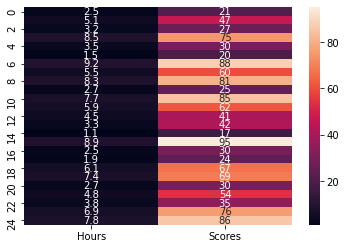

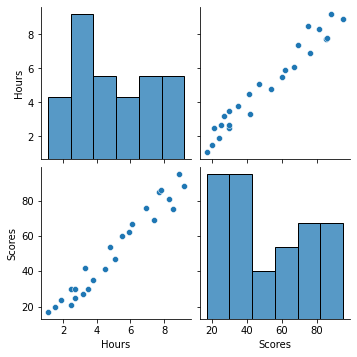

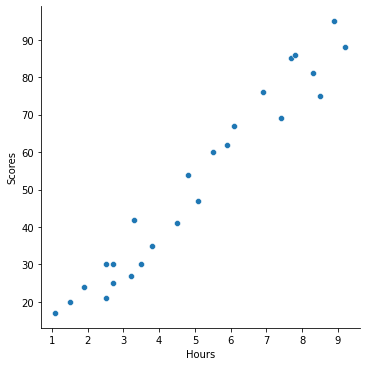

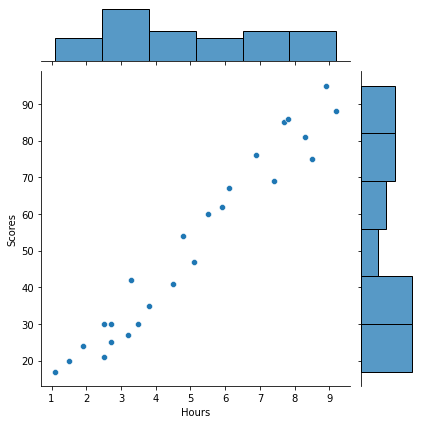

In [10]:
student_corr= data_std.corr()
sns.heatmap(data_std, annot= True)
sns.pairplot(data_std)
sns.relplot(x="Hours", y="Scores", data= data_std)
sns.jointplot(x="Hours", y="Scores", data= data_std)

Text(0, 0.5, 'Percentage Obtained')

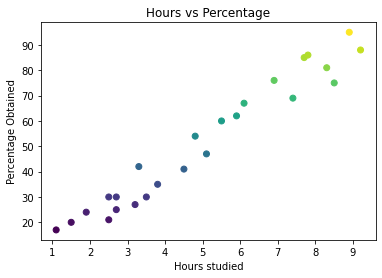

In [11]:
X = data_std.iloc[:,:-1].values
y = data_std['Scores'].values  
plt.scatter(X, y, c=y)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours studied')
plt.ylabel('Percentage Obtained')

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [12]:
X = data_std.iloc[:, :-1].values  
y = data_std.iloc[:, 1].values  

After having our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [13]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.20, random_state=42) 

### **Training the Algorithm**
Now, we have split our data into training and testing sets,

and now it is finally the time to train our algorithm. 

In [14]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


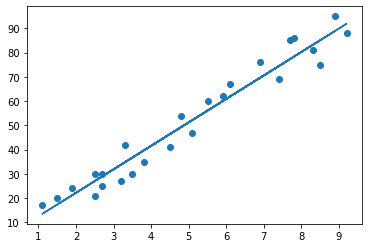

In [15]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [16]:
print(X_test) # Testing data- In hours
y_pred= regressor.predict(X_test) #prediction of the score

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [17]:
# Here Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [18]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.38611528261494


### **Evaluating the model**

Finally we evaluate the performance of the algorith.

This step will determine and compare how well different algorithms perform on the particular dataset.

In [19]:
from sklearn import metrics
print('Mean Absolute Error :',
     metrics.mean_absolute_error(y_test, y_pred))  # Evaluation by Mean_Absolute_Error Method
import math
print('Mean Square Error :',metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Square Error :',math.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error : 3.9207511902099244
Mean Square Error : 18.943211722315272
Root Mean Square Error : 4.352380006653288
